In [2]:
import tensorflow as tf
hello = tf.constant("Hi Hello")
sess = tf.Session()
print(hello)
print(sess.run(hello))


Tensor("Const:0", shape=(), dtype=string)
b'Hi Hello'


In [72]:
import time
start = time.time()
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# y = 3 x1 + 2 x2 + 3 인 선형방정식을 이후에 feed_dict로 집어넣음
x_data = np.random.random_sample(10000).reshape(5000, 2)
y_data = x_data.dot(np.array([3,2]).reshape(2, 1)) + 3


W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis function: 간단히, 우리가 정의한 예측 모델 
hypothesis = tf.matmul(X, W) + b
"""
hypothesis = tf.matmul(tf.multiply(X, X), W) + b
hypothesis를 바꾸어서 돌려도 상관없다. 요 부분 빼고 나머지는 모두 동일하므로. 
"""
# cost: 모델이 잘 만들어졌는지를 어떤 방법으로 평가할 것인가? 혹은 못 만들어진 모델에 대해서 어떻게 불이익을 줄 것인가? 
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 일단은 어떤 놈으로 최적화를 진행할지 찾고, learning_rate도 지정해준다. 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# 그리고, 옵티마이저에 cost를 미니마이즈하라고 연결해준다. 
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Fit the line
iter_num = 5000
for step in range(iter_num):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: x_data, Y: y_data}) # 1) 
    """ 2) 1)과 정확히 같은 semantic. 
    sess.run(train, feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
    cost_val = sess.run(cost, feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
    W_val = sess.run(W)
    b_Val = sess.run(b)
    """
    if step == iter_num -1:
        print("step {}: cost({})".format(step, cost_val))
        print("W: {}, \nb: {}".format(W_val, b_val))
print(time.time() - start )

step 4999: cost(1.6558068409722182e-06)
W: [[ 2.99708104]
 [ 1.99677289]], 
b: [ 3.00325894]
4.9457011222839355


In [73]:
start = time.time()
from sklearn.linear_model import LinearRegression
linModel= LinearRegression()
linModel.fit(x_data, y_data)
print("W: {}, b: {}".format(linModel.coef_, linModel.intercept_))
print(time.time() - start)

W: [[ 3.  2.]], b: [ 3.]
0.05197501182556152


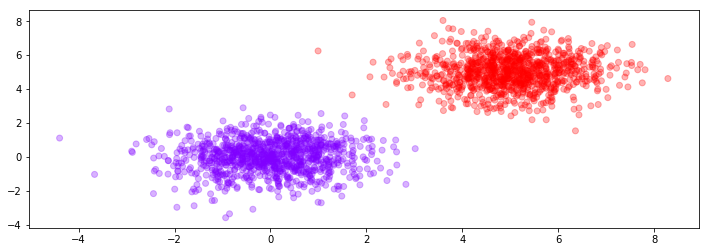

In [142]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

sample_size = 1000
x_data = np.vstack(
    [np.array([np.random.normal(0, 1, sample_size) for i in range(0, 2)]).reshape(sample_size, 2),
     np.array([np.random.normal(5, 1, sample_size) for i in range(0, 2)]).reshape(sample_size, 2)]
)
y_data = np.array([0 for i in range(0, sample_size)]+[1 for i in range(0, sample_size)]).reshape(sample_size*2, 1)
plt.figure(figsize=(12, 4))
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap = plt.cm.rainbow, alpha=0.3)
plt.savefig('../../assets/images/markdown_img/guassian_random_sample_20180529_1545.svg')
plt.show()


In [148]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
"""
- 이건, 아마도 처음 나온 형식인 것 같은데, 일종의 지역변수 설정이라고 생각하면 됩니다. 
with 구문 아래에 들여쓰기된 부분에서만 살아 있으며, 여기를 벗어나면 sess는 자동으로 사라짐. 
"""
npW = 0
npb = 0
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 2500 == 0:
            print(step, cost_val)
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    npW = sess.run(W)
    npb = sess.run(b)

0 0.233398
2500 0.0560301
5000 0.0350374
7500 0.0260067
10000 0.0209273

Hypothesis:  [[ 0.06183419]
 [ 0.00194065]
 [ 0.03753087]
 ..., 
 [ 0.99990153]
 [ 0.99748284]
 [ 0.99286121]] 
Correct (Y):  [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]] 
Accuracy:  1.0


numpy.ndarray

/Users/frhyme/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


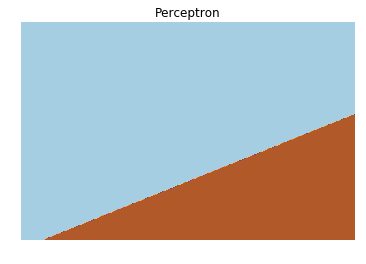

In [173]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = np.array([[2,1],[3,4],[4,2],[3,1]])
Y = np.array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = Perceptron(n_iter=100).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')
plt.show()

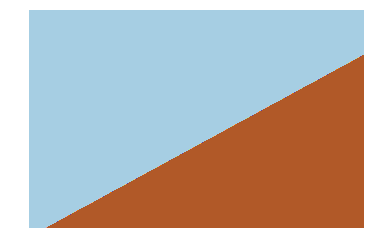

In [174]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt



x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')
plt.show()

/Users/frhyme/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


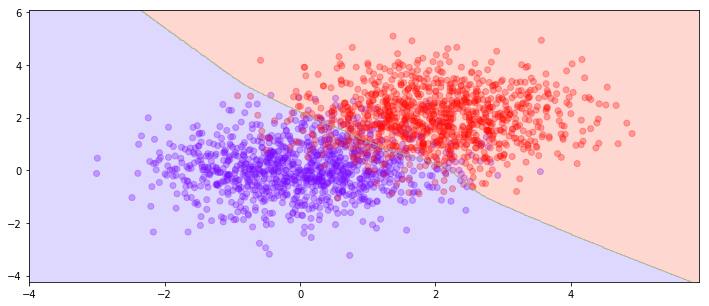

In [196]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

sample_size = 1000
x_data = np.vstack(
    [np.array([np.random.normal(0, 1, sample_size) for i in range(0, 2)]).reshape(sample_size, 2),
     np.array([np.random.normal(2, 1, sample_size) for i in range(0, 2)]).reshape(sample_size, 2)]
)
y_data = np.array([0 for i in range(0, sample_size)]+[1 for i in range(0, sample_size)]).reshape(sample_size*2, 1)


# clf learning
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu').fit(x_data, y_data)
predicted_y = clf.predict(x_data)
clf.score(x_data, y_data)



plt.figure(figsize=(10, 5))
# 원래 값들을 그대로 뿌림. 
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap = plt.cm.rainbow, alpha=0.3)

# meshgrid 
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
####
plt.savefig('../../assets/images/markdown_img/decision_boundary_20180529_1635.svg')
plt.show()

In [200]:
plt.contour(np.array([1,2,3,4]).reshape(2,2), np.array([1,2,3,4]).reshape(2,2))
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars